In [1]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model


from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
no_of_class = len(class_names)

In [3]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y_oh = np.eye(no_of_class)[y]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size = 0.15)

In [5]:
input_shape = X_train.shape[1:]

In [6]:
input_layer = Input(shape = input_shape)

x = Dense(units=64, activation='relu')(input_layer)
x = Dense(units=64, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=64, activation='relu')(x)
x = Dense(units=32, activation='relu')(x)
x = Dense(units=16, activation='relu')(x)
x = Dense(units=8, activation='relu')(x)

x = Dense(units=3, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs= 10, validation_data=(X_test,y_test))

Epoch 1/10
4/4 [==============================] - 0s 47ms/step - loss: 1.0826 - accuracy: 0.4961 - val_loss: 1.0615 - val_accuracy: 0.6957
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 1.0391 - accuracy: 0.4882 - val_loss: 1.0072 - val_accuracy: 0.6087
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.9531 - accuracy: 0.5197 - val_loss: 0.9163 - val_accuracy: 0.7391
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8418 - accuracy: 0.6378 - val_loss: 0.8221 - val_accuracy: 0.7826
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7425 - accuracy: 0.7244 - val_loss: 0.7635 - val_accuracy: 0.8261
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6823 - accuracy: 0.7795 - val_loss: 0.7246 - val_accuracy: 0.9130
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.8740 - val_loss: 0.6782 - val_accuracy: 0.9565
Epoch 8/10
4/4 [=================

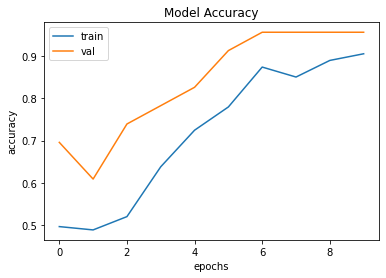

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

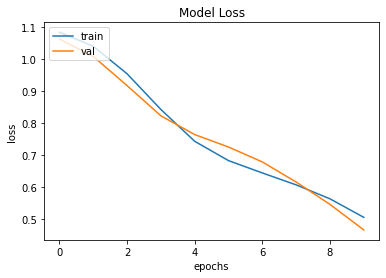

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
predictions = model.predict(X_test)
preds = []
for i in predictions:
  preds.append(np.argmax(i))

targets = []
for i in y_test:
  targets.append(np.argmax(i))

In [13]:
print ("{:<20} {:<40}".format('Predictions', 'Targets\n'))

c=0
for i, j in zip(preds, targets):
  if(i==j):
    print('\33[94m')
  else:
    c += 1
    print('\33[91m')
  print ("{:<20} {:<40}".format(class_names[i], class_names[j]))

Predictions          Targets
                                

virginica            virginica                               

virginica            virginica                               

virginica            virginica                               

setosa               setosa                                  

versicolor           versicolor                              

virginica            virginica                               

versicolor           versicolor                              

versicolor           versicolor                              

versicolor           versicolor                              

versicolor           versicolor                              

setosa               setosa                                  

virginica            virginica                               

versicolor           virginica                               

versicolor           versicolor                              

versicolor           versicolor                        

In [14]:
print('We can observe that, {} out of {} examples are classified incorrectly and {} are correct.'.format(c, len(preds), len(preds)-c))
print('Test accuracy:', (len(preds)-c)/len(preds))
print('\33[91mNote that we have used the same data for test as well as validation and therefore the test and validation accuracy is same.')

We can observe that, 1 out of 23 examples are classified incorrectly and 22 are correct.
Test accuracy: 0.9565217391304348
Note that we have used the same data for test as well as validation and therefore the test and validation accuracy is same.
